Summary Statistics:
                                Date          Open          High  \
count                           6316   6316.000000   6316.000000   
mean   2008-09-27 15:13:33.932868864   6501.330415   6560.252272   
min              1996-01-02 00:00:00      0.000000      0.000000   
25%              2002-05-29 18:00:00      0.000000      0.000000   
50%              2008-09-11 12:00:00   5250.075000   5304.900000   
75%              2015-01-29 06:00:00  10766.087500  10831.000000   
max              2021-07-01 00:00:00  29259.600000  29311.550000   
std                              NaN   6438.413164   6496.742655   

                Low         Close        Volume      Turnover  
count   6316.000000   6316.000000  6.316000e+03  6.316000e+03  
mean    6440.806966  11051.869824  2.058477e+07  1.227881e+10  
min        0.000000    762.470000  0.000000e+00  0.000000e+00  
25%        0.000000   4590.837500  9.775997e+06  6.087300e+09  
50%     5188.600000   9306.300000  1.534848e+07

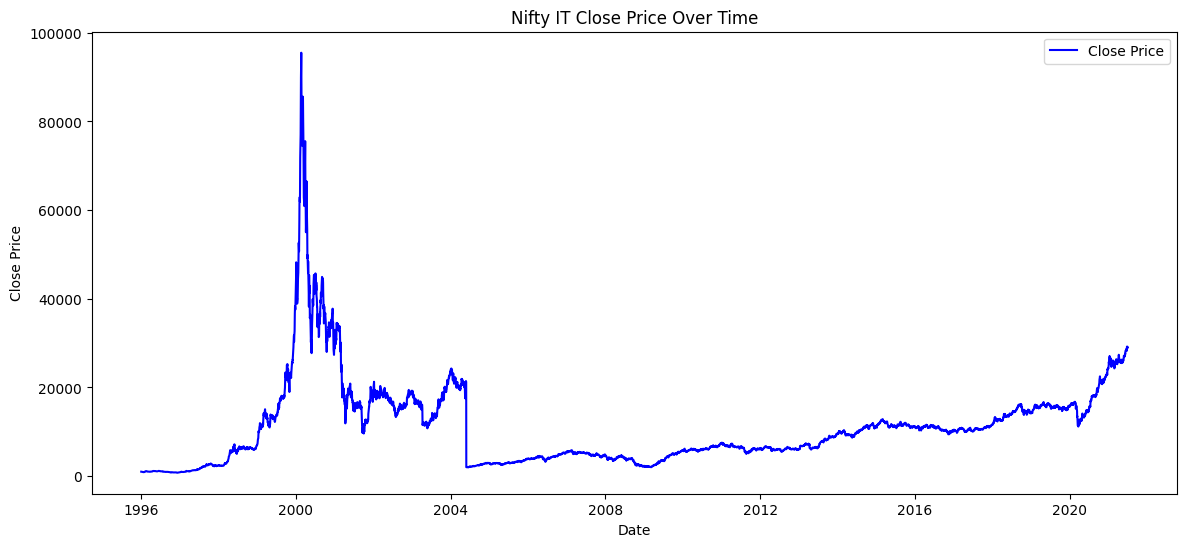

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/kaggle/input/niftyit/NIFTY IT.csv' 
nifty_it_data = pd.read_csv(file_path)

# Convert 'Date' to datetime format
nifty_it_data['Date'] = pd.to_datetime(nifty_it_data['Date'])

# Handle missing values by dropping rows with missing values
nifty_it_cleaned = nifty_it_data.dropna()


print("Summary Statistics:")
print(nifty_it_cleaned.describe()) 

# Time series plot for 'Close' prices
plt.figure(figsize=(14, 6))
plt.plot(nifty_it_cleaned['Date'], nifty_it_cleaned['Close'], label='Close Price', color='blue')
plt.title('Nifty IT Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()





/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


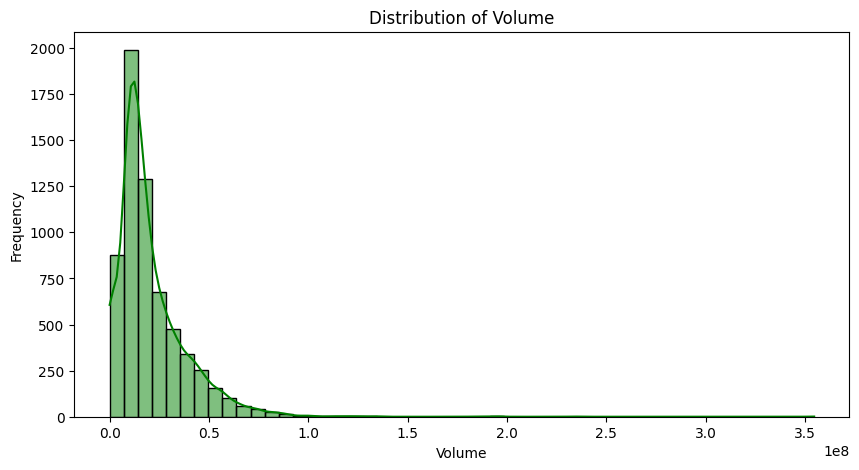

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


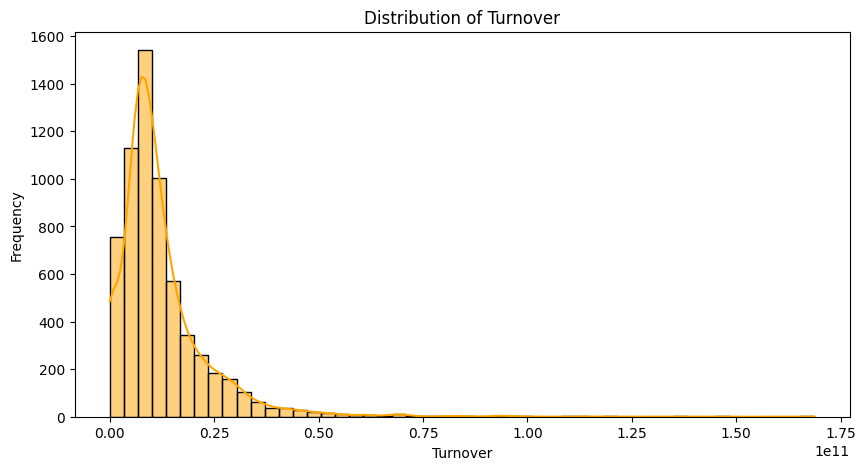

In [19]:
# Distribution of 'Volume'
plt.figure(figsize=(10, 5))
sns.histplot(nifty_it_cleaned['Volume'], bins=50, kde=True, color='green')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Turnover'
plt.figure(figsize=(10, 5))
sns.histplot(nifty_it_cleaned['Turnover'], bins=50, kde=True, color='orange')
plt.title('Distribution of Turnover')
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.show()


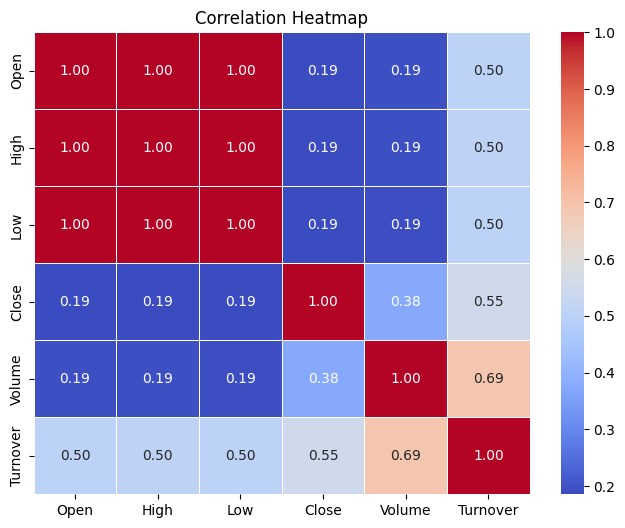

In [17]:
# Correlation heatmap
correlation_matrix = nifty_it_cleaned[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [2]:
import pandas as pd
data=pd.read_csv('/kaggle/input/niftyit/NIFTY IT.csv')

print(data.head())


         Date  Open  High  Low    Close   Volume   Turnover
0  1996-01-01   0.0   0.0  0.0  1000.00      NaN        NaN
1  1996-01-02   0.0   0.0  0.0   995.84  66050.0  6800000.0
2  1996-01-03   0.0   0.0  0.0   986.97  50000.0  2900000.0
3  1996-01-04   0.0   0.0  0.0   980.39  81600.0  7800000.0
4  1996-01-05   0.0   0.0  0.0   984.08  83400.0  5100000.0


In [3]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Volume      11
Turnover    11
dtype: int64


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/kaggle/input/niftyit/NIFTY IT.csv'  # Update this path
data = pd.read_csv(file_path)

# Step 1: Convert 'Date' to datetime and sort by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Step 2: Handle missing values (drop or impute)
data = data.dropna()  # Dropping rows with missing values
# Alternatively, you could fill missing values:
# data['Volume'] = data['Volume'].fillna(data['Volume'].median())
# data['Turnover'] = data['Turnover'].fillna(data['Turnover'].median())

# Step 3: Add new features
# Daily price range
data['Price_Range'] = data['High'] - data['Low']

# Moving averages (e.g., 7-day and 30-day)
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()

# Daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Step 4: Handle outliers (optional)
# Remove rows where 'Volume' or 'Turnover' is above the 99th percentile
volume_threshold = np.percentile(data['Volume'], 99)
turnover_threshold = np.percentile(data['Turnover'], 99)
data = data[(data['Volume'] <= volume_threshold) & (data['Turnover'] <= turnover_threshold)]

# Step 5: Scale numerical features
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']] = scaler.fit_transform(
    data[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']]
)

# Step 6: Drop any rows with NaNs introduced by rolling calculations
data = data.dropna()

# Final dataset
print(data.head())



         Date  Open  High  Low     Close    Volume  Turnover  Price_Range  \
30 1996-02-13   0.0   0.0  0.0  0.003353  0.002126  0.000303          0.0   
31 1996-02-14   0.0   0.0  0.0  0.003556  0.002731  0.000292          0.0   
32 1996-02-15   0.0   0.0  0.0  0.003702  0.003795  0.000506          0.0   
33 1996-02-16   0.0   0.0  0.0  0.003642  0.002741  0.000396          0.0   
34 1996-02-19   0.0   0.0  0.0  0.003829  0.002860  0.000376          0.0   

            MA7        MA30  Daily_Return  
30  1021.301429  957.998667      0.006148  
31  1035.555714  961.450667      0.017812  
32  1052.557143  965.659333      0.012580  
33  1071.352857  969.896667     -0.005138  
34  1090.331429  974.600667      0.015973  


In [5]:
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Turnover        0
Price_Range     0
MA7             0
MA30            0
Daily_Return    0
dtype: int64


In [6]:
# Drop the specified columns
data = data.drop(columns=['Open', 'Volume', 'Turnover'])


print(data.head())


         Date  High  Low     Close  Price_Range          MA7        MA30  \
30 1996-02-13   0.0  0.0  0.003353          0.0  1021.301429  957.998667   
31 1996-02-14   0.0  0.0  0.003556          0.0  1035.555714  961.450667   
32 1996-02-15   0.0  0.0  0.003702          0.0  1052.557143  965.659333   
33 1996-02-16   0.0  0.0  0.003642          0.0  1071.352857  969.896667   
34 1996-02-19   0.0  0.0  0.003829          0.0  1090.331429  974.600667   

    Daily_Return  
30      0.006148  
31      0.017812  
32      0.012580  
33     -0.005138  
34      0.015973  


In [7]:
print(data.isnull().sum())

Date            0
High            0
Low             0
Close           0
Price_Range     0
MA7             0
MA30            0
Daily_Return    0
dtype: int64


In [8]:
# Step 1: Volatility metrics
data['Price_Range'] = data['High'] - data['Low']
data['Price_Range_Pct'] = (data['High'] - data['Low']) / data['Close']

# Step 2: Rolling statistics
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()
data['Rolling_STD'] = data['Close'].rolling(window=7).std()

# Step 3: Trend indicators
data['Momentum'] = data['Close'].pct_change()  # Daily percentage change
data['Cumulative_Return'] = (1 + data['Momentum']).cumprod()

# Step 4: Lag features
data['Lag_Close_1'] = data['Close'].shift(1)
data['Lag_Close_2'] = data['Close'].shift(2)

# Step 5: Date-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop rows with NaNs introduced by rolling or lag features
data = data.dropna()

# Display the first few rows of the updated dataset
print(data.head())


         Date  High  Low     Close  Price_Range       MA7      MA30  \
59 1996-03-29   0.0  0.0  0.002642          0.0  0.002350  0.002897   
60 1996-04-02   0.0  0.0  0.002637          0.0  0.002388  0.002873   
61 1996-04-03   0.0  0.0  0.002732          0.0  0.002441  0.002845   
62 1996-04-04   0.0  0.0  0.002611          0.0  0.002489  0.002809   
63 1996-04-05   0.0  0.0  0.002667          0.0  0.002541  0.002776   

    Daily_Return  Price_Range_Pct  Rolling_STD  Momentum  Cumulative_Return  \
59      0.034568              0.0     0.000139  0.156327           0.787906   
60     -0.000484              0.0     0.000177 -0.001958           0.786364   
61      0.008901              0.0     0.000218  0.036066           0.814725   
62     -0.011260              0.0     0.000212 -0.044431           0.778526   
63      0.005249              0.0     0.000204  0.021429           0.795209   

    Lag_Close_1  Lag_Close_2  Year  Month  Day_of_Week  Is_Weekend  
59     0.002285     0.002213 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [ ]:
data

In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
numerical_cols = ['High', 'Low', 'Close', 'Price_Range', 'Price_Range_Pct', 
                  'MA7', 'MA30', 'Rolling_STD', 'Momentum', 'Cumulative_Return', 
                  'Lag_Close_1', 'Lag_Close_2']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply normalization to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the normalized dataset
print(data.head())


         Date  High  Low     Close  Price_Range       MA7      MA30  \
59 1996-03-29   0.0  0.0  0.175870          0.0 -0.101790  0.297943   
60 1996-04-02   0.0  0.0  0.171534          0.0 -0.068351  0.273548   
61 1996-04-03   0.0  0.0  0.251272          0.0 -0.022394  0.245476   
62 1996-04-04   0.0  0.0  0.149497          0.0  0.019683  0.208299   
63 1996-04-05   0.0  0.0  0.196402          0.0  0.064601  0.175084   

    Daily_Return  Price_Range_Pct  Rolling_STD  Momentum  Cumulative_Return  \
59      0.034568              0.0    -0.321522  1.625112           0.175870   
60     -0.000484              0.0     0.127214  0.093738           0.171534   
61      0.008901              0.0     0.618363  0.461609           0.251272   
62     -0.011260              0.0     0.545299 -0.317183           0.149497   
63      0.005249              0.0     0.446255  0.319998           0.196402   

    Lag_Close_1  Lag_Close_2  Year  Month  Day_of_Week  Is_Weekend  
59    -0.136259    -0.209736 

In [10]:
from sklearn.model_selection import train_test_split

# No column is dropped; all columns, including 'Close', are part of the features
X = data.copy()

# Split the data into training and testing sets (70% train, 30% test)
train_data, test_data = train_test_split(X, test_size=0.3, random_state=42, shuffle=False)

# Display the sizes of the training and testing sets
print(f"Training set size: {train_data.shape[0]} samples")
print(f"Testing set size: {test_data.shape[0]} samples")



Training set size: 114 samples
Testing set size: 50 samples


#checking

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Importing numpy for square root

# Extract date-related features from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the 'Date' column after extracting features
X = data.drop(columns=['Daily_Return', 'Date'])  # Keep 'Daily_Return' as the target and drop 'Date'
y = data['Daily_Return']  # 'Daily_Return' is the target variable

# Split the data into training and testing sets (70% train, 30% test)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(train_X, train_y)

# Make predictions on the test set
test_y_pred = model.predict(test_X)

# Evaluate the model's performance
mse = mean_squared_error(test_y, test_y_pred)
rmse = np.sqrt(mse)  # Calculating RMSE
r2 = r2_score(test_y, test_y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Predict the Daily Returns for the next 30 days (using last 30 days of features as input)
future_X = test_X[-30:]  # Last 30 days of feature data
future_predictions = model.predict(future_X)

# Print the predicted daily returns for the next 30 days
print(f"Predicted Daily Returns for the next 30 days: {future_predictions}")


Mean Squared Error: 4.561630458186949e-05
Root Mean Squared Error: 0.006753984348654466
R^2 Score: 0.7253752900671517
Predicted Daily Returns for the next 30 days: [ 0.03399456 -0.00932898  0.01197767  0.00061667  0.00273415 -0.00226284
 -0.01613124 -0.00584974 -0.01459049 -0.00960405 -0.0226653  -0.00940263
 -0.02289889  0.03009778  0.01992036  0.00762856 -0.00485877 -0.00144081
  0.00573213 -0.02253698  0.0010702   0.00683599  0.00300509 -0.00882903
  0.01314596 -0.0012115  -0.00503837 -0.03298147 -0.05606861 -0.04029761]


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the training set
train_y_pred = model.predict(train_X)

# Make predictions on the test set
test_y_pred = model.predict(test_X)

# Calculate Mean Squared Error (MSE) for both train and test sets
train_mse = mean_squared_error(train_y, train_y_pred)
test_mse = mean_squared_error(test_y, test_y_pred)

# Calculate Mean Absolute Error (MAE) for both train and test sets
train_mae = mean_absolute_error(train_y, train_y_pred)
test_mae = mean_absolute_error(test_y, test_y_pred)

# Print evaluation metrics
print(f"Train MSE: {train_mse:.8f}")
print(f"Test MSE: {test_mse:.8f}")
print(f"Train MAE: {train_mae:.8f}")
print(f"Test MAE: {test_mae:.8f}")


Train MSE: 0.00000002
Test MSE: 0.00004562
Train MAE: 0.00009220
Test MAE: 0.00383542


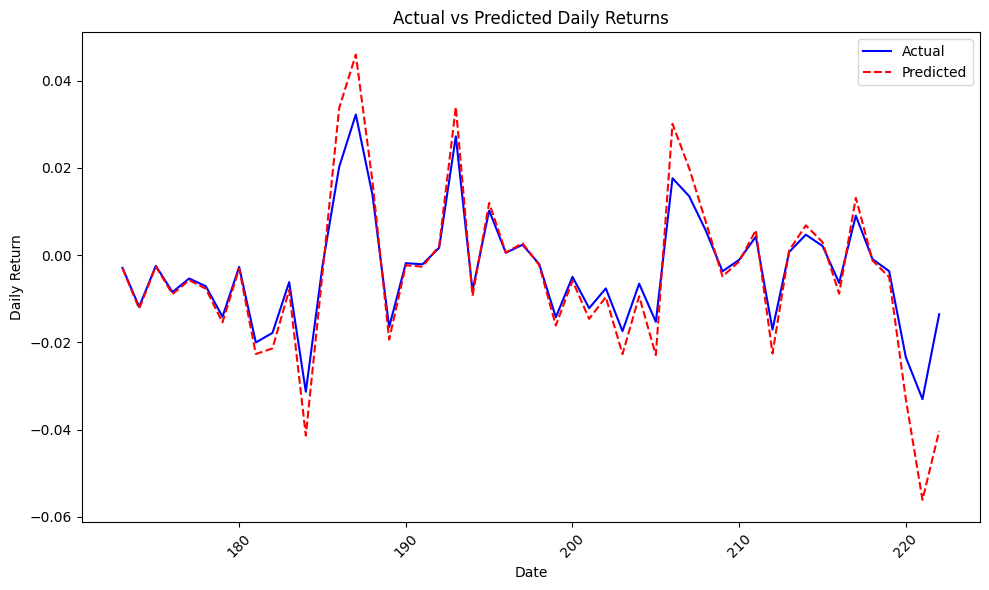

In [13]:
import matplotlib.pyplot as plt

# Step 1: Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(test_y.index, test_y, label='Actual', color='blue')

# Plot predicted values
plt.plot(test_y.index, test_y_pred, label='Predicted', color='red', linestyle='--')

# Adding titles and labels
plt.title('Actual vs Predicted Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Importing numpy for square root
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(train_X, train_y)

# Make predictions on the test set
test_y_pred_rf = rf_model.predict(test_X)

# Evaluate the Random Forest model's performance
mse_rf = mean_squared_error(test_y, test_y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculating RMSE
r2_rf = r2_score(test_y, test_y_pred_rf)

# Print evaluation metrics
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")
print(f"R^2 Score (Random Forest): {r2_rf}")

# Predict the Daily Returns for the next 6 months (using the last 130 days of features as input)
future_predictions_rf = rf_model.predict(future_X)

# Print the predicted daily returns for the next 6 months
print(f"Predicted Daily Returns for the next 6 months (Random Forest): {future_predictions_rf}")


Mean Squared Error (Random Forest): 7.110673857416749e-05
Root Mean Squared Error (Random Forest): 0.008432481163582133
R^2 Score (Random Forest): 0.5719147433314223
Predicted Daily Returns for the next 6 months (Random Forest): [ 0.02880377 -0.01505241  0.0180278   0.00097321  0.0038211  -0.00351326
 -0.02710211 -0.00893382 -0.0271853  -0.01615248 -0.02851036 -0.01820779
 -0.02777713  0.02881299  0.02882225  0.01437004 -0.00908041 -0.00265033
  0.01247542 -0.0276592   0.00272356  0.0146835   0.00699996 -0.01562827
  0.02892366 -0.00243153 -0.00895207 -0.02774238 -0.02851036 -0.02797286]


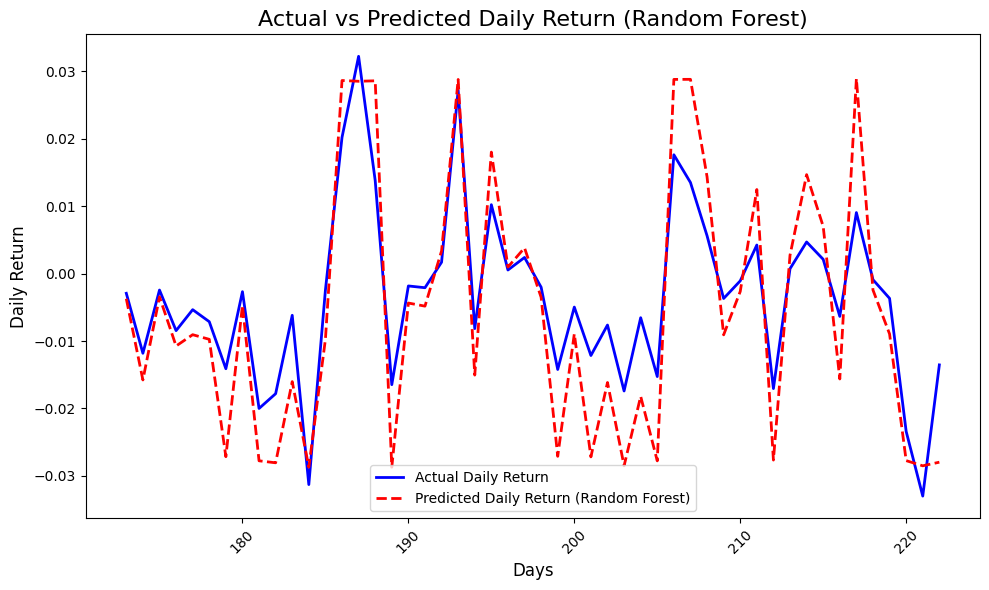

In [15]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted daily returns for the Random Forest model

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(test_y.index, test_y, label='Actual Daily Return', color='blue', linestyle='-', linewidth=2)

# Plot predicted values (Random Forest)
plt.plot(test_y.index, test_y_pred_rf, label='Predicted Daily Return (Random Forest)', color='red', linestyle='--', linewidth=2)

# Customize the plot
plt.title('Actual vs Predicted Daily Return (Random Forest)', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the training set
train_y_pred_rf = rf_model.predict(train_X)

# Make predictions on the test set
test_y_pred_rf = rf_model.predict(test_X)

# Calculate Mean Squared Error (MSE) for both train and test sets
train_mse_rf = mean_squared_error(train_y, train_y_pred_rf)
test_mse_rf = mean_squared_error(test_y, test_y_pred_rf)

# Calculate Mean Absolute Error (MAE) for both train and test sets
train_mae_rf = mean_absolute_error(train_y, train_y_pred_rf)
test_mae_rf = mean_absolute_error(test_y, test_y_pred_rf)

# Print evaluation metrics
print(f"Train MSE (Random Forest): {train_mse_rf:.8f}")
print(f"Test MSE (Random Forest): {test_mse_rf:.8f}")
print(f"Train MAE (Random Forest): {train_mae_rf:.8f}")
print(f"Test MAE (Random Forest): {test_mae_rf:.8f}")


Train MSE (Random Forest): 0.00000106
Test MSE (Random Forest): 0.00007111
Train MAE (Random Forest): 0.00059234
Test MAE (Random Forest): 0.00691536
